# Test Settings (to be deleted)

<li>Import Modules</li>

In [1]:
import os
import numpy as np
import pandas as pd
# import matplotlib as plt
# from random import sample, seed

%matplotlib inline

<li>Define Directory path</li>

In [3]:
# Work Directories
# git_dir = r'\\imapc\benutzer\Mitarbeiterdaten\henss\_02_software\_08_github'
# work_dir = r'C:\Users\henss'

# Mac Directories
git_dir = r'/Users/markhenss/Documents/GitHub'
work_dir = r'/Applications/anaconda3'


<li>Load GitHub Modules</li>

In [4]:
os.chdir(git_dir)
import whypy
os.chdir(work_dir)

# Causal Inference (Short Introduction)

The discovery of causal relationships from purely observational data is a fundamental prob- lem in science. The most elementary form of such a causal discovery problem is to decide whether X causes Y or, alternatively, Y causes X, given joint observations of two variables X, Y. An example is to decide whether altitude causes temperature, or vice versa, given only joint measurements of both variables. Even under the simplifying assumptions of no confounding, no feedback loops, and no selection bias, such bivariate causal discovery prob- lems are challenging. Nevertheless, several approaches for addressing those problems have been proposed in recent years. We review two families of such methods: methods based on Additive Noise Models (ANMs) and

![Alt text](__pictures/cause-effect.png?raw=true "Cause-Effect")

# Load Example

<p>There are various models, scalers and observational datasets available to be loaded</p>

<b>whypy.load.observational</b>(<i>parameters</i>)
<p style="margin-left: 40px">
    This is a short explanation
    <br><br>
    <mark>parameters:</mark><br>
    <u>modelclass:</u> Defines the Number of variables (2V or 3V); Linear (Li) and non linear (NLi) models; Noise form (Gaussian Additive: GAM); the ground truth of causal structure (collider, reverse-collider, series, confounded, no relation)<br>
    Available Models: '3VNLiGAM-collider', '3VNLiGAM-rev-collider', '3VNLiGAM-series', '3VNLiGAM-confounded', '3VNLiGAM-none'<br>
    <u>no_observations:</u>  (Default: 100) <br>
    <u>seed:</u>  (Default:None)
    <br><br>
    <mark>returns:</mark><br>
    <u>observations:</u> Numpy Array (# observations, # variables)<br>
</p>


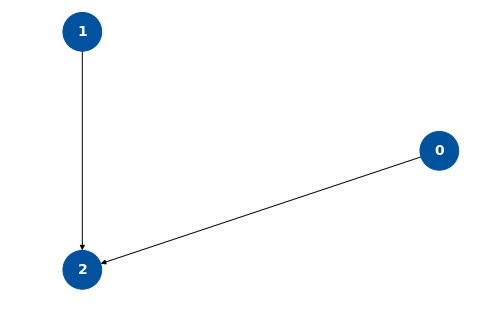

In [8]:
obs = whypy.load.observations(modelclass=5, no_obs=500, seed=1)
columns = ['age', 'gender', 'sex']
# obs = obs.to_numpy()

# seed=1
# rand_obs = np.array(sample(obs.flatten().tolist(), 500)).reshape(-1,1)
# obs = np.concatenate([obs, rand_obs], axis=1)

In [9]:
# os.chdir(r'\\imapc\benutzer\Mitarbeiterdaten\henss\_02_software')
# data = pd.read_csv('Test2_Bearing1.csv', sep=',' , header=0, index_col=None)
# obs = np.array(data)

In [10]:
# regmod = whypy.load.model_svr('rbf')
regmod = whypy.load.model_polynomial_lr(2)
# regmod = whypy.load.model_lingam(term='spline')
scaler = whypy.load.scaler_standard()

In [11]:
mymodel1 = whypy.steadystate.mvariate.Model(obs=obs, combinations='all', regmod=regmod, scaler=scaler)
mymodel2 = whypy.steadystate.bivariate.Model(obs=obs, combinations='all', regmod=regmod, scaler=scaler, obs_name=columns)

<h1>Run</h1>

In [12]:
mymodel1.run(testtype='LikelihoodVariance', #LikelihoodVariance LikelihoodEntropy KolmogorovSmirnoff MannWhitney HSIC
            scale=True,
            bootstrap=False,
            holdout=False,
            plot_inference=False,
            plot_results=False,
#             bootstrap_ratio=1,
#             bootstrap_seed=5,
#             holdout_ratio=0.2,
#             holdout_seed=1,
#             modelpts=50,
#             gridsearch = True,
#             param_grid = {'C': [0.001, 0.01, 1, 10],
#                           'gamma': [0, 0.00001, 0.001, 0.1, 1],
#                           'coef0': [0],
#                           'tol': [0.001],
#                           'epsilon': [0.1]},
            )

In [13]:
# mymodel.plot_inference()

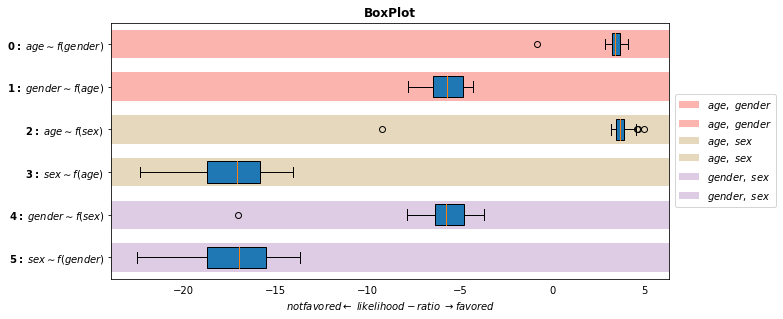

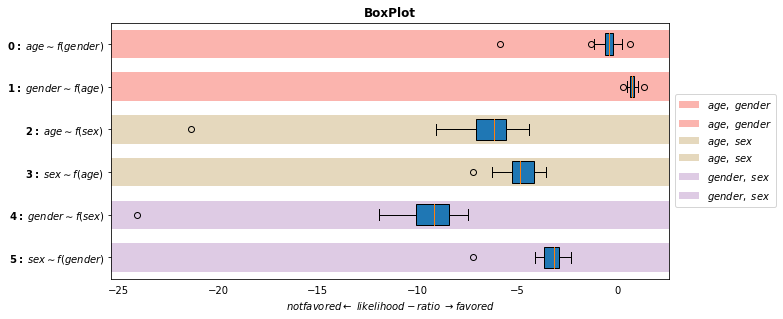

In [10]:
mymodel2.run(testtype='LikelihoodVariance', #LikelihoodVariance LikelihoodEntropy KolmogorovSmirnoff MannWhitney HSIC
            scale=True,
            bootstrap=30,
            holdout=True,
            plot_inference=False,
            plot_results=True,
#             bootstrap_ratio=1,
#             bootstrap_seed=5,
#             holdout_ratio=0.2,
#             holdout_seed=1,
#             modelpts=50,
#             gridsearch = True,
#             param_grid = {'C': [0.001, 0.01, 1, 10],
#                           'gamma': [0, 0.00001, 0.001, 0.1, 1],
#                           'coef0': [0],
#                           'tol': [0.001],
#                           'epsilon': [0.1]},
            )

In [11]:
mymodel2._results_df


index Fitted Combination  Bivariate Comparison tdep tindeps tindep  \
0      0     $age,\ gender$  $age \sim f(gender)$    0     [1]      1   
1      0     $age,\ gender$  $gender \sim f(age)$    1     [0]      0   
2      0        $age,\ sex$     $age \sim f(sex)$    0     [2]      2   
3      0        $age,\ sex$     $sex \sim f(age)$    2     [0]      0   
4      0     $gender,\ sex$  $gender \sim f(sex)$    1     [2]      2   
5      0     $gender,\ sex$  $sex \sim f(gender)$    2     [1]      1   

          Normality Indep. Variable SW_pvalue [List]  \
0  [9.174220494401197e-09, 1.2581369446706958e-05...   
1  [0.07172016054391861, 0.01349840871989727, 0.3...   
2  [3.649910878242777e-18, 1.3378791434164088e-16...   
3  [0.07172016054391861, 0.01349840871989727, 0.3...   
4  [3.649910878242777e-18, 1.3378791434164088e-16...   
5  [9.174220494401197e-09, 1.2581369446706958e-05...   

  Normality Indep. Variable SW_pvalue [Median]  \
0                                    1.967e-10   
1                                    4.341e-01   
2                                    2.535e-18   
3                                    4.341e-01   
4                                    2.535e-18   
5                                    1.967e-10   

  Normality Indep. Variable SW_pvalue [SD]  \
0                                3.609e-06   
1                                2.577e-01   
2                                1.203e-16   
3                                2.577e-01   
4                                1.203e-16   
5                                3.609e-06   

     Normality Indep. Variable Pearson_pvalue [List]  ...  \
0  [1.1762364238483928e-11, 1.5393808856710522e-0...  ...   
1  [0.11800737201767288, 0.0783157534591265, 0.31...  ...   
2  [3.8340701022867694e-27, 1.7274560169036556e-2...  ...   
3  [0.11800737201767288, 0.0783157534591265, 0.31...  ...   
4  [3.8340701022867694e-27, 1.7274560169036556e-2...  ...   
5  [1.1762364238483928e-11, 1.5393808856710522e-0...  ...   

  Normality Residuals Pearson_pvalue [SD]  \
0                               3.483e-02   
1                               3.578e-01   
2                               5.124e-03   
3                               1.692e-01   
4                               4.374e-02   
5                               2.557e-01   

          Normality Residuals Combined_pvalue [List]  \
0  [1.6974924616690583e-13, 2.3619619590414085e-1...   
1  [0.6603203427891817, 7.214231446820654e-06, 0....   
2  [7.291144160060468e-10, 8.370690512257363e-12,...   
3  [2.0286025994704707e-19, 2.886253174949047e-22...   
4  [4.673660758849156e-29, 8.886490044160222e-32,...   
5  [0.0002262229567556294, 0.02945786377691666, 0...   

  Normality Residuals Combined_pvalue [Median]  \
0                                    3.135e-10   
1                                    5.323e-01   
2                                    7.772e-09   
3                                    6.547e-21   
4                                    2.001e-13   
5                                    1.023e-02   

  Normality Residuals Combined_pvalue [SD]  \
0                                2.202e-02   
1                                4.068e-01   
2                                1.264e-04   
3                                3.381e-02   
4                                4.159e-03   
5                                2.296e-01   

  Dependence: Indep. Variable - Residuals LikelihoodVariance [List]  \
0  [-0.20445179709545025, -0.339351161676392, 0.1...                  
1  [0.7078546436747026, 0.5637190899442118, 0.948...                  
2  [-5.5950002882231455, -5.2988864578505055, -5....                  
3  [-3.5485628259598596, -3.576036432467088, -4.9...                  
4  [-8.329110943611834, -8.380616446956406, -8.39...                  
5  [-2.8718374330768004, -2.5672369398645767, -2....                  

  Dependence: Indep. Variable - Residuals LikelihoodVariance [Median]  \
0                                         

In [12]:
set(["age","sex",'gender'])

{'age', 'gender', 'sex'}